In [ ]:
import os as os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ModernAI_HR_project/Data')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
resume_data = pd.read_csv('UpdatedResumeDataSet.csv')
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Data Preprocessing

In [ ]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader
def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = "".join(page.extract_text() for page in reader.pages)
    return text

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [ ]:
import nltk
nltk.download('punkt')

# preprocessing text
resume_data['Resume'] = resume_data['Resume'].apply(lambda w: preprocess(w))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

#Data Exploration

In [ ]:
# create list of all categories
categories = np.sort(resume_data['Category'].unique())
categories

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [ ]:
# create new df for corpus and category
df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories

[                                                Resume  Category
 84   technical qualifications windows ms officeeduc...  Advocate
 85   education details b com b university clacutta ...  Advocate
 86   education details llb dibrugarh university adv...  Advocate
 87   education details november january llm masters...  Advocate
 88   skills knows english native speaker ielts over...  Advocate
 89   qualification introduction computer extraeduca...  Advocate
 90   skills natural languages proficient english hi...  Advocate
 91   skills legal writing efficient researcher lega...  Advocate
 92   good grasping quality skillful work education ...  Advocate
 93   hard working quick learnereducation details ju...  Advocate
 94   technical qualifications windows ms officeeduc...  Advocate
 95   education details b com b university clacutta ...  Advocate
 96   education details llb dibrugarh university adv...  Advocate
 97   education details november january llm masters...  Advocate
 98   skil

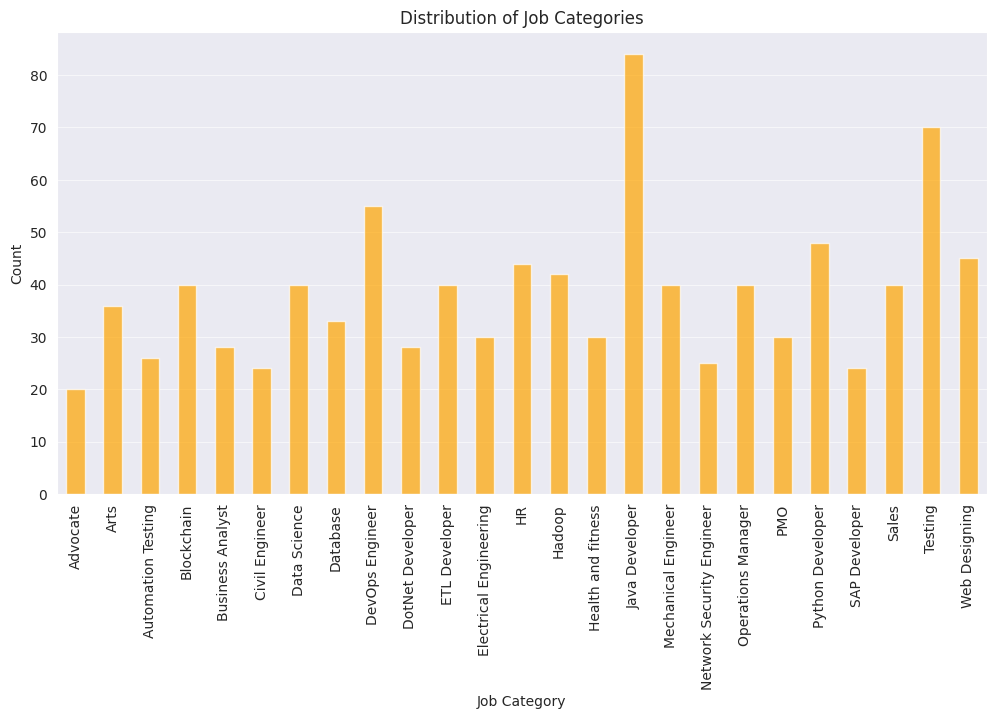

In [ ]:
import seaborn as sns

sns.set_style("darkgrid")
resume_data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), alpha=0.7, color="#FFA500")

plt.title('Distribution of Job Categories')
plt.ylabel('Count')
plt.xlabel('Job Category')
plt.grid(axis='y',alpha=0.6)
plt.grid(axis='x', alpha=0)
plt.show()

### Word Cloud

'''After word clouds are created, the word "manag" (inflected for "manage") prominently visible on many categories. Moreover, words like "citi", "state" and "compani" are noticeable on different categories as well. These common words are likely to contain low weight for computation. On the other hand, words like "account", "develop" and "design" probably has higher weight for calculation because it only appears on specific domains.
'''

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [ ]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

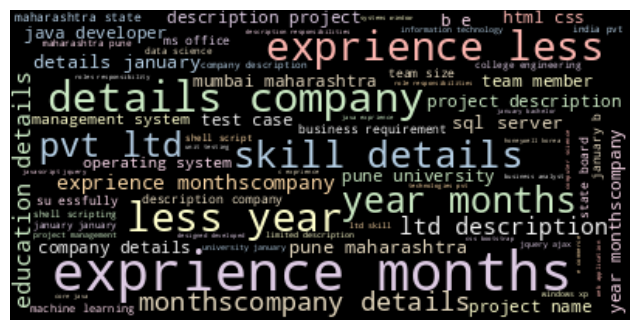

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="black", colormap= 'Pastel1').generate(cleanedSentences)
plt.figure(figsize=(8,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

# Prepare data for peredictive models

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_data[i] = le.fit_transform(resume_data[i])

In [ ]:
resume_data.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resume_data['Resume'].values
requiredTarget = resume_data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(769, 7015)
(193, 7015)


# Matching Job with Resume

## 1. Traditional Machine Learning - KNN

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.97


In [ ]:
from sklearn.model_selection import cross_val_score

# Split the data into features (X) and target (y)
X = WordFeatures
y = requiredTarget

# Create the multi-label classifier
clf = OneVsRestClassifier(KNeighborsClassifier())

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))

In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

## 2. Deep Learning - LSTM




In [ ]:
resume_data['Resume'] = resume_data['Resume'].apply(lambda w: preprocess(w))

In [ ]:
from sklearn.utils import shuffle

features = resume_data['Resume'].values
original_labels = resume_data['Category'].values
labels = original_labels.astype(str)  # Convert labels to strings

for i in range(len(resume_data)):
    labels[i] = labels[i].lower()  # Convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # Replace spaces

features, labels = shuffle(features, labels)

print(features[0])
print(labels[0])

skills natural languages proficient english hindi marathi computer skills proficient ms office internet operation education details january january llb law mumbai maharashtra mumbai university january b mumbai maharashtra k somaiya college mumbai university h c asmita girls junior college maharashtra board c vidya bhawan maharashtra board advocate llb student journalist skill details company details company criminal lawyer law firm description
0


In [ ]:
#### Split for train and test
train_split = 0.8
train_size = int(train_split * len(resume_data))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]


print(len(train_labels))
print(len(test_labels))

769
193


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, 'management': 9, 'team': 10, 'maharashtra': 11, 'system': 12, 'testing': 13, 'year': 14, 'database': 15, 'development': 16, 'business': 17, 'ltd': 18, 'test': 19, 'less': 20, 'using': 21, 'sql': 22, 'skill': 23, 'january': 24, 'client': 25, 'java': 26, 'developer': 27, 'engineering': 28, 'application': 29, 'pune': 30, 'work': 31, 'c': 32, 'services': 33, 'skills': 34, 'education': 35, 'software': 36, 'pvt': 37, 'responsibilities': 38, 'sales': 39, 'reports': 40, 'process': 41, 'operations': 42, 'requirements': 43, 'server': 44, 'customer': 45, 'technical': 46, 'technologies': 47, 'university': 48, 'india': 49, 'monthscompany': 50, 'working': 51, 'design': 52, 'various': 53, 'python': 54, 'environment': 55, 'web': 56, 'college': 57, 'b': 58, 'engineer': 59, 'e': 60, 'automation': 61, 'like': 62, 'role': 63, 'time': 64, 'mysql': 65, 'support': 66, 'windows': 67, 'based': 68, 'tec

In [ ]:
# Tokenize label data
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'15': 1, '23': 2, '8': 3, '20': 4, '24': 5, '12': 6, '13': 7, '18': 8, '10': 9, '6': 10, '22': 11, '16': 12, '3': 13, '1': 14, '7': 15, '14': 16, '11': 17, '19': 18, '9': 19, '4': 20, '2': 21, '17': 22, '21': 23, '5': 24, '0': 25}


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[  34 2089  210  974  483  941 1505   84   34  974   95  119  812  544
   35    7   24   24 3131  986   81   11   81   48   24   58   81   11
  312    1   57   81   48  474   32    1    1 1094   57   11  186   32
 1982    1   11  186 1520 3131  506    1   23    7    3    7    3 2220
    1  986 2968    6    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459994 (1.75 MB)
Trainable params: 459994 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [ ]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
25/25 - 19s - loss: 3.2091 - accuracy: 0.1261 - val_loss: 3.1072 - val_accuracy: 0.0829 - 19s/epoch - 774ms/step
Epoch 2/12
25/25 - 7s - loss: 2.9342 - accuracy: 0.2354 - val_loss: 2.7435 - val_accuracy: 0.2902 - 7s/epoch - 268ms/step
Epoch 3/12
25/25 - 8s - loss: 2.3356 - accuracy: 0.3433 - val_loss: 2.2362 - val_accuracy: 0.3264 - 8s/epoch - 317ms/step
Epoch 4/12
25/25 - 7s - loss: 1.6622 - accuracy: 0.5137 - val_loss: 1.4808 - val_accuracy: 0.6010 - 7s/epoch - 273ms/step
Epoch 5/12
25/25 - 8s - loss: 1.1623 - accuracy: 0.6762 - val_loss: 1.1483 - val_accuracy: 0.7098 - 8s/epoch - 308ms/step
Epoch 6/12
25/25 - 8s - loss: 0.9096 - accuracy: 0.7750 - val_loss: 0.8411 - val_accuracy: 0.7720 - 8s/epoch - 331ms/step
Epoch 7/12
25/25 - 7s - loss: 0.5901 - accuracy: 0.8362 - val_loss: 0.5513 - val_accuracy: 0.8756 - 7s/epoch - 269ms/step
Epoch 8/12
25/25 - 8s - loss: 0.4198 - accuracy: 0.8869 - val_loss: 0.3909 - val_accuracy: 0.9171 - 8s/epoch - 320ms/step
Epoch 9/12
25/25 - 8s 

In [ ]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

7/7 [==============================] - 0s 63ms/step - loss: 0.1672 - accuracy: 0.9845


In [ ]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.984455943107605


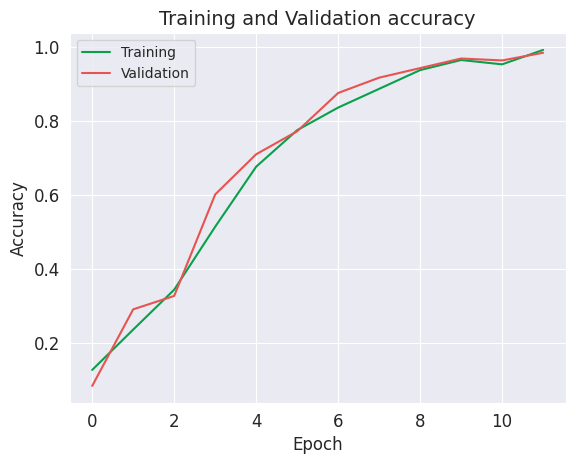

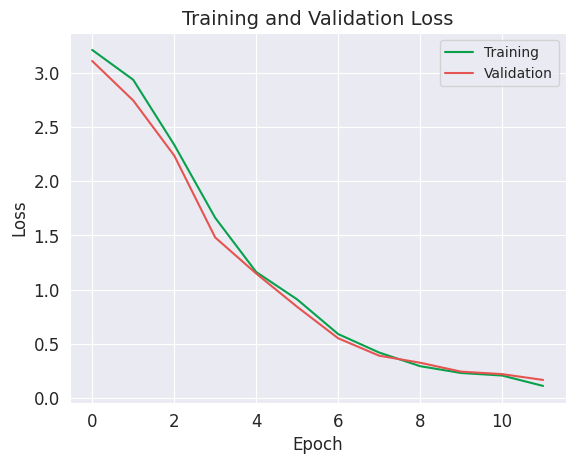

In [ ]:
import seaborn as sns

sns.set_style("darkgrid")

plt.plot(history.history['accuracy'], color='#08A04B' )
plt.plot(history.history['val_accuracy'],color='#E55451')

plt.title('Training and Validation accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], color='#08A04B')
plt.plot(history.history['val_loss'], color='#E55451')

plt.title('Training and Validation Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Training','Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict labels for the test data
predictions = model.predict(test_feature_padded)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(test_label_sequences, predicted_labels, average='weighted')
recall = recall_score(test_label_sequences, predicted_labels, average='weighted')
f1 = f1_score(test_label_sequences, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


7/7 [==============================] - 1s 59ms/step
Precision: 0.9830166954519286
Recall: 0.9844559585492227
F1-score: 0.9831227694153042


#Most common words in Resume

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the 'resume' column to obtain CountVectorizer features
count_features = count_vectorizer.fit_transform(resume_data['Resume'])

# Print the shape of the count matrix
print("Count matrix shape:", count_features.shape)


Count matrix shape: (962, 7015)


In [ ]:
!pip install transformers

## Frequency Count (Counter)

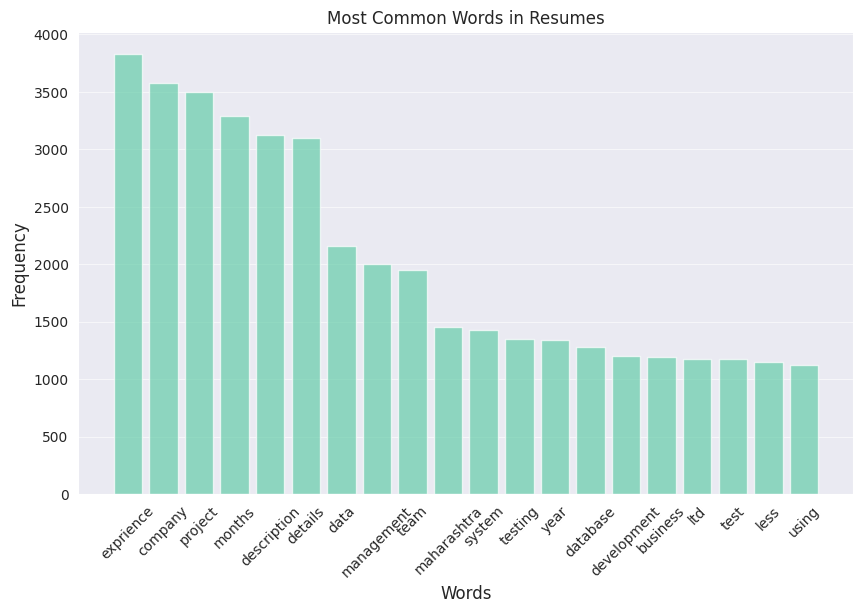

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt



# Tokenize and preprocess the text
stop_words = set(stopwords.words('english'))
resume_data['Resume'] = resume_data['Resume'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

# Calculate word frequencies
word_freq = Counter(' '.join(resume_data['Resume']).split())

# Get the most common words
most_common_words = word_freq.most_common(20)

# Visualize the most common words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words], alpha=0.7, color='#66CDAA')
plt.xticks(rotation=45)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Common Words in Resumes')
plt.grid(axis='y',alpha=0.6)
plt.grid(axis='x', alpha=0)
plt.show()


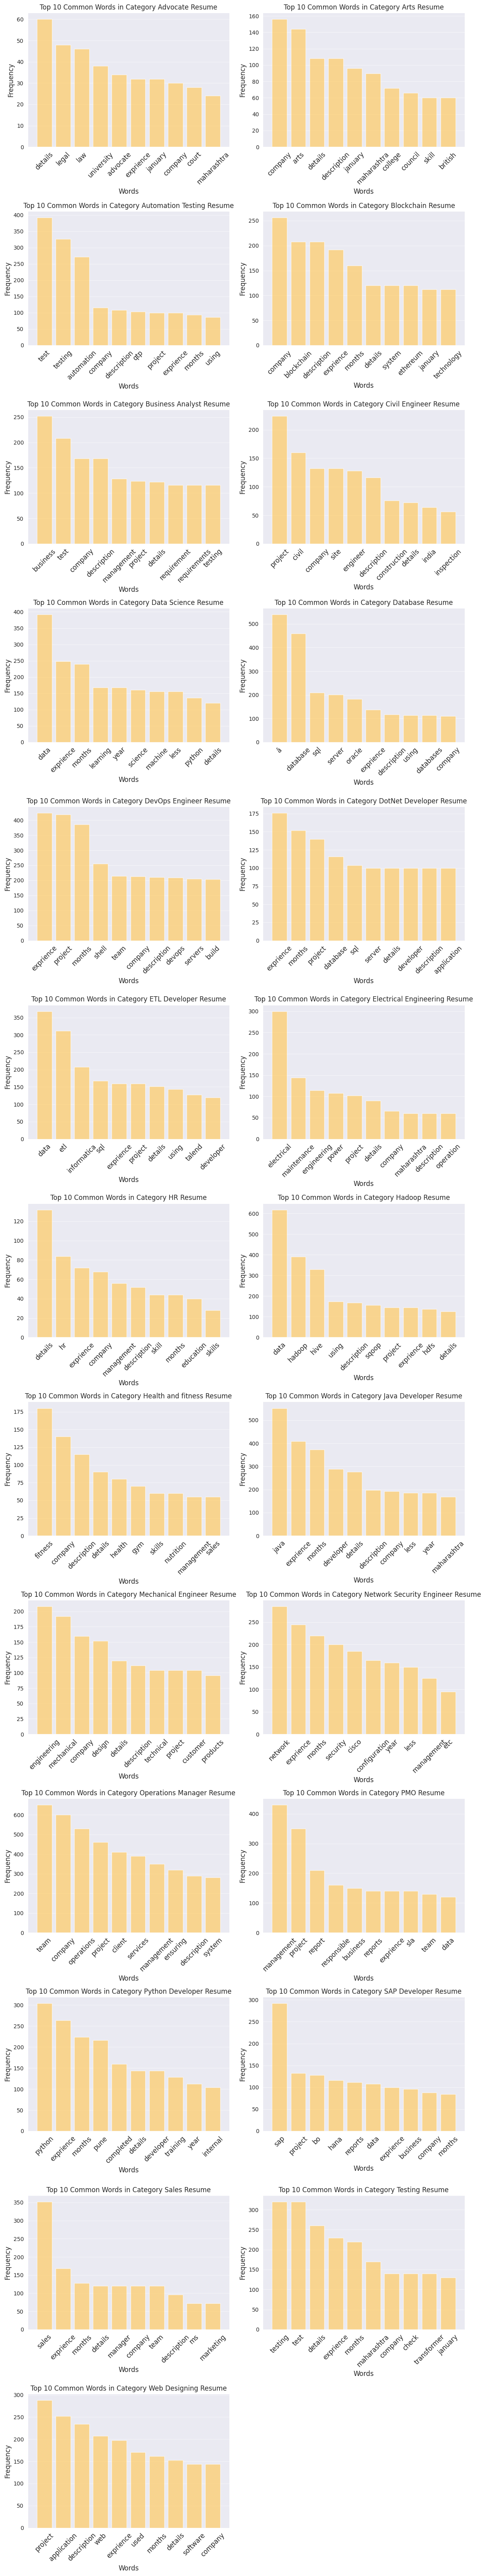

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique category numbers from the 'Category' column
unique_categories = resume_data['Category'].unique()

# Create a dictionary mapping category numbers to category names
category_names = {}
for category_num in unique_categories:
    category_name = f"Category {category_num}"
    category_names[category_num] = category_name

# Tokenize and preprocess the text, removing stopwords
stop_words = set(stopwords.words('english'))
resume_data['Resume'] = resume_data['Resume'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

# Calculate word frequencies for each category
word_freq_per_category = {}
for category, group in resume_data.groupby('Category'):
    word_freq = Counter(' '.join(group['Resume']).split())
    word_freq_per_category[category] = word_freq

# Determine the number of categories and rows for subplot layout
num_categories = len(word_freq_per_category)
num_rows = (num_categories + 1) // 2  # Adjust the number of rows based on the number of categories

# Set figure size based on the number of categories
fig_width = 12
fig_height = num_rows * 5  # Adjust the multiplier as needed

# Visualize the most common words for each category
sns.set_style("darkgrid")
plt.figure(figsize=(fig_width, fig_height))
for i, (category, word_freq) in enumerate(word_freq_per_category.items(), start=1):
    plt.subplot(num_rows, 2, i)  # Adjust the number of columns based on the number of categories
    most_common_words = word_freq.most_common(10)  # Change 10 to the number of most common words you want to display
    plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words], color='#FFCC66', alpha=0.7)
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    category_name = category_names.get(category, f"Category {category}")
    plt.title(f'Top 10 Common Words in {category_name} Resume')
    plt.grid(axis='y',alpha=0.6)
    plt.grid(axis='x', alpha=0)
plt.tight_layout()

plt.show()


## TF-IDF vectors

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Tokenize and preprocess the text
stop_words = set(stopwords.words('english'))
resume_data['Resume'] = resume_data['Resume'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a dictionary to store top keywords for each job category
top_keywords_per_category = {}

# Group resumes by job category
for category, group in resume_data.groupby('Category'):
    # Fit and transform TF-IDF vectorizer on resumes in the current category
    tfidf_vectors = tfidf_vectorizer.fit_transform(group['Resume'])

    # Get feature names (words) from TF-IDF vectorizer
    # Calculate average TF-IDF score for each word across all resumes in the category
    # Create a dictionary to store word-TF-IDF pairs
    feature_names = tfidf_vectorizer.get_feature_names_out()
    avg_tfidf_scores = tfidf_vectors.mean(axis=0).A1

    word_tfidf_scores = dict(zip(feature_names, avg_tfidf_scores))

    # Sort words by TF-IDF score in descending order and extract top keywords
    top_keywords = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]  # Adjust 10 to the number of keywords you want

    # Store top keywords for the current category in the dictionary
    top_keywords_per_category[category] = top_keywords

# Print top keywords for each job category
for category, keywords in top_keywords_per_category.items():
    print(f"Job Category: {category}")
    for keyword, score in keywords:
        print(f"{keyword}: {score}")
    print()


Job Category: 0
details: 0.14003098033706107
legal: 0.1175524437663417
mumbai: 0.10121643739288269
maharashtra: 0.09752279910524903
january: 0.09707592014734732
less: 0.0898779048733281
year: 0.0898779048733281
exprience: 0.08956905136091646
law: 0.08397229822461906
university: 0.07666280300906453

Job Category: 1
details: 0.09974643239567524
january: 0.094903465164932
company: 0.09222592701387075
arts: 0.09004462971892058
days: 0.08277663476001873
maharashtra: 0.0826018781925122
karate: 0.07624906588865164
board: 0.07043537382555581
state: 0.06929089438358371
college: 0.06468381135144842

Job Category: 2
test: 0.22048495091376058
testing: 0.20820574592033475
automation: 0.14217814257189945
good: 0.13703324546224827
knowledge: 0.10040975658234172
qtp: 0.09251384721664715
exprience: 0.08834309855352841
months: 0.07183137089543253
company: 0.07150618462185798
excellent: 0.06937489614639492

Job Category: 3
company: 0.1360247250449907
blockchain: 0.12187716144123527
exprience: 0.119958313

# Most frequently utilized skills in each category

#### As we explained, the skills words not capture properly so we improve with NER